resources:
1. https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb


##Practical Statistics for Data Scientists (Python)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api 
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

##Estimates of Location

Example: Location Estimates of Population and Murder Rates

In [3]:
state = pd.read_csv("state.csv")
print(state.head())

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA


Compute the mean, trimmed mean, and median for Population.

In [4]:
#For mean and median we can use the pandas methods of the data frame.
print(state['Population'].mean())

6162876.3


In [5]:
#Weighted mean
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [6]:
#The trimmed mean requires the trim_mean function in scipy.stats.
from scipy.stats import trim_mean

print(trim_mean(state['Population'], 0.1))

4783697.125


In [7]:
#median
print(state['Population'].median())

4436369.5


Weighted mean is available with numpy. For weighted median, we can use the specialised package wquantiles (https://pypi.org/project/wquantiles/).
```
pip install wquantiles

import wquantiles
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))
```
```
def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]

weighted_median(state, 'Murder.Rate', 'Population') 
```

In [8]:
pip install weightedstats

In [9]:
#Weighted median
import weightedstats as ws

print(ws.weighted_median(state["Murder.Rate"],weights=state['Population']))

4.4


In [10]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##Estimates of Variability (Disperson Metrics)

In [11]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [12]:
#Variance
print(np.var(state['Population']))
#That's a huge number but std dev stays in the same scale.

45960360825926.56


In [13]:
#Standard deviation 
print(state.Population.std())

6848235.347401142


In [14]:
#Mean absolute deviation
from numpy import mean,absolute

mean(absolute(state['Population'] - mean(state['Population'])))

4450933.356000001

In [15]:
#Median absolute deviation

print(stats.median_absolute_deviation(state.Population))

3849870.3852


In [16]:
#Range of Population
print(state.Population.max()-state.Population.min())

36690330


In [17]:
#Percentile
q = np.percentile(state['Murder.Rate'], 20)
q

2.3

In [18]:
#Interquartile range is calculated as the difference of the 75% and 25% quantile.
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [19]:
q3 , q1 = np.percentile(state['Population'], [75,25])
iqr = q3-q1
iqr

4847308.0

##Exploring the Data Distribution

###Percentiles and Boxplots

In [20]:
#Pandas has the quantile method for data frames.
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


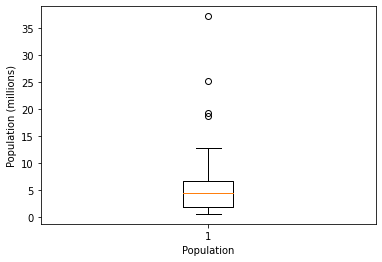

In [21]:
#Boxplot
#plt.boxplot((state.loc[:,'Population'])/1000000)
plt.boxplot(state['Population']/1_000_000)
plt.ylabel('Population (millions)')
plt.xlabel('Population')
plt.show()

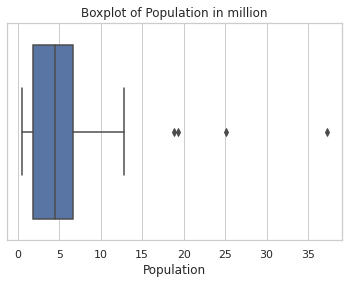

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=(state['Population'])/1000000).set_title('Boxplot of Population in million')

###Frequency Table and Histograms
The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table

In [23]:
#Frequency Table of population
binnedPopulation = pd.cut(state['Population'], 10)
temp = binnedPopulation.value_counts()
pd.DataFrame({'BinRange':temp.index, 'Count':temp.values})

,BinRange,Count
0,"(526935.67, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(33584923.0, 37253956.0]",1
5,"(22577824.0, 26246857.0]",1
6,"(18908791.0, 22577824.0]",1
7,"(15239758.0, 18908791.0]",1
8,"(29915890.0, 33584923.0]",0
9,"(26246857.0, 29915890.0]",0


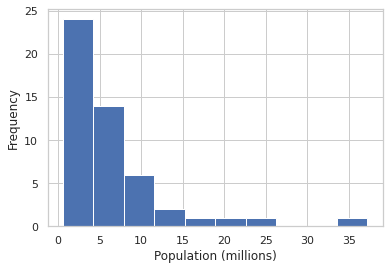

In [24]:
#Histogram
#Pandas also supports histograms for exploratory data analysis.
plt.hist(state['Population'] / 1_000_000)
plt.ylabel('Frequency')
plt.xlabel('Population (millions)')
plt.show()

###Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument bw_method to control the smoothness of the density curve.

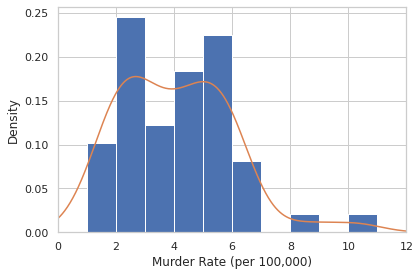

In [25]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

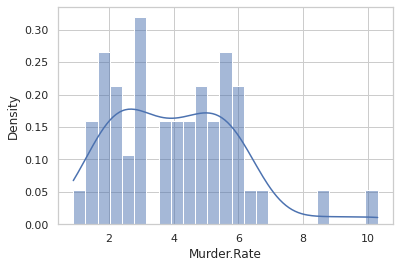

In [26]:
sns.histplot(state["Murder.Rate"],kde=True,linewidth=1 ,stat="density", bins=25);

##Exploring Binary and Categorical Data

In [27]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
dtype: float64

In [28]:
dfw = pd.read_csv('dfw_airline.csv')

###Bar-chart

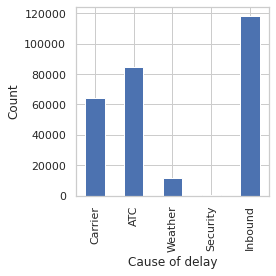

In [29]:
#Pandas also supports bar charts for displaying a single categorical variable.
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

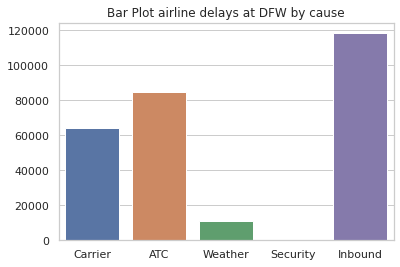

In [30]:
sns.barplot(data=dfw).set_title("Bar Plot airline delays at DFW by cause");

###pie-chart

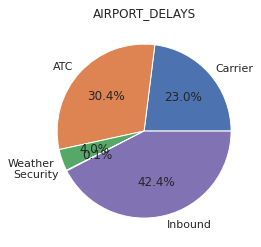

In [31]:
plt.pie(dfw.iloc[0], labels = dfw.columns, autopct='%1.1f%%')
plt.title("AIRPORT_DELAYS")
plt.show() 

##Exploring Two or More Variables

###Correlation

In [32]:
sp500_sym = pd.read_csv("sp500_sectors.csv")
sp500_px = pd.read_csv("sp500_data.csv.gz", index_col=0)

In [33]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
#telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom = sp500_px[(sp500_px.index)>'2012-07-01'][telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [34]:
telecom.corr(method='spearman')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


###heatmap

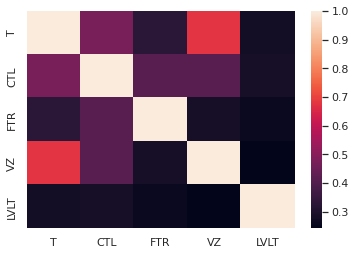

In [35]:
sns.heatmap(telecom.corr());

###Scatterplots

Simple scatterplots are supported by pandas. Specifying the marker as $\u25EF$ uses an open circle for each point.

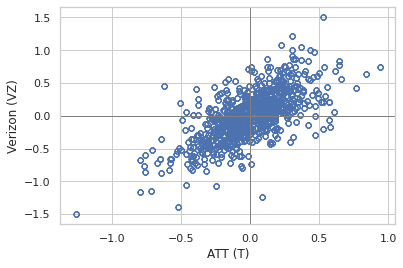

In [36]:
#here we can see that there is indeed a strong correlation between T and VZ
plt.scatter(telecom['T'],telecom['VZ'], marker='$\u25EF$')
plt.xlabel('ATT (T)')
plt.ylabel('Verizon (VZ)')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

###Hexagonal binning

Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

In [37]:
kc_tax = pd.read_csv('kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


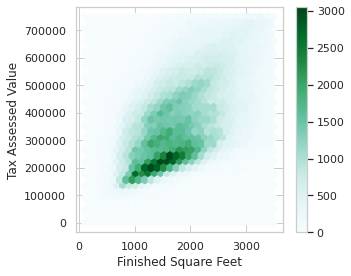

In [38]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',gridsize=30,
                         sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

###Contours

The seaborn kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved.

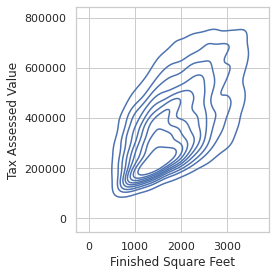

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

###pivot table

In [40]:
lc_loans = pd.read_csv('lc_loans.csv')

In [41]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [42]:
data_air= pd.read_csv("airline_stats.csv")
data_air

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


###Violin plot

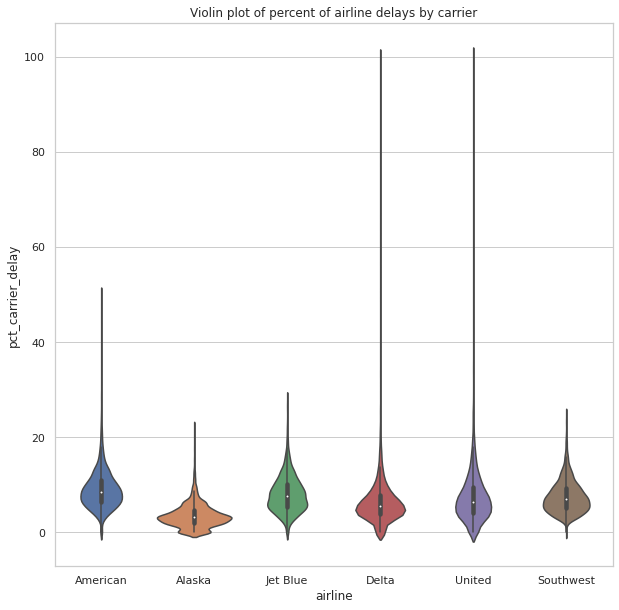

In [43]:
plt.figure(figsize=(10,10))
sns.violinplot(data=data_air, x="airline" , y="pct_carrier_delay")
plt.title("Violin plot of percent of airline delays by carrier");

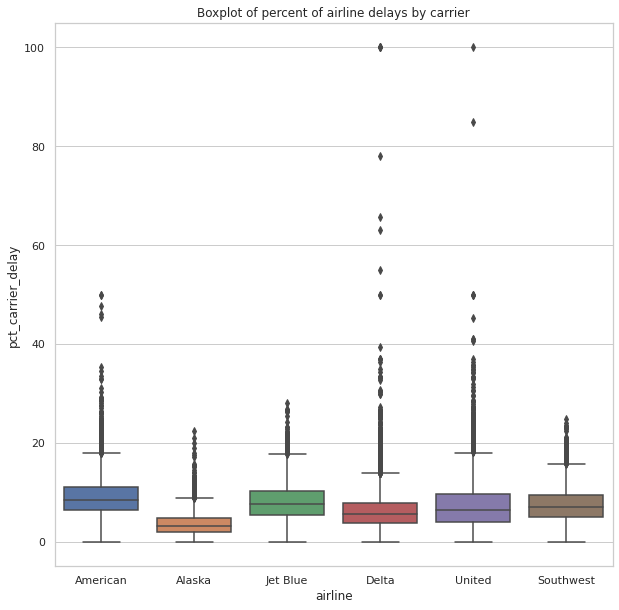

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_air, x="airline" , y="pct_carrier_delay")
plt.title("Boxplot of percent of airline delays by carrier");